# <center> **Logarithmic and Cubic Regression Models For Biomedical Data Study** </center>

In [1]:
## Loading Librarbies and Checking For Availability
try:
    import pandas as pd
    print("Library is available.")
    from statsmodels.formula.api import ols
    print("Library is available.")
    from statsmodels.stats.anova import anova_lm
    print("Library is available.")
    import matplotlib.pyplot as plt
    print("Library is available.")
    import numpy as np
    print("Library is available.")
    import seaborn as sns 
    print("Library is available.")
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print("Library is available.")
    from io import StringIO
    print("Library is available.")
 
except ImportError:
    print("Library is not available.")

## Changing Potential Options
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Library is available.
Library is available.
Library is available.
Library is available.
Library is available.
Library is available.
Library is available.
Library is available.


In [2]:
## Loading Dataset For Modeling
health = pd.read_excel('health_cleaned_python.xlsx')
health.head(10)

,Date,Weight,Waist,Neck,Morning Body Temp,Morning Systolic Pressure,Morning Diastolic Pressure,Morning Pulse,Night Body Temp,Night Systolic Pressure,Night Diastolic Pressure,Night Pulse,Sleep,BMI,CBF,Gym,Cardio,Calories,Carbs,Fat,Protein,Fiber,Sugar,Servings,Water,Fat Calories
0,2024-01-26,275.6,47.5,17.0,95.7,113,73,74,97.4,128,79,73,11.5,39.54,35.19,1,1,1465.00,189.50,50.50,73.00,19.00,67.50,17.00,0.50,454.50
1,2024-01-27,271.8,47.0,17.0,96.2,114,75,67,97.8,108,75,82,5.5,38.99,34.57,1,0,2521.00,499.95,85.00,71.50,34.50,325.45,72.50,0.75,765.00
2,2024-01-28,271.8,47.0,17.0,96.7,136,76,71,96.1,112,63,70,8.0,38.99,34.57,0,0,1385.19,172.41,39.08,74.29,41.21,66.44,16.35,0.50,351.68
3,2024-01-29,272.8,47.0,17.0,97.5,131,85,76,97.1,158,88,86,8.0,39.14,34.57,1,0,570.00,108.00,12.00,4.00,8.00,46.00,6.00,0.50,108.00
4,2024-01-30,269.6,46.5,17.0,97.7,123,79,84,98.6,120,71,81,10.0,38.68,33.95,1,1,1946.33,259.04,60.10,104.33,47.73,67.67,19.30,2.00,540.88
5,2024-01-31,268.6,47.0,17.0,96.1,132,75,62,96.5,156,83,73,9.0,38.54,34.57,1,0,1265.23,195.20,34.86,69.58,42.56,96.87,20.90,1.50,313.76
6,2024-02-01,268.8,46.5,17.0,96.4,132,70,71,97.3,113,75,89,10.0,38.56,33.95,1,1,2167.33,309.47,70.80,67.88,19.91,213.35,17.50,1.00,637.21
7,2024-02-02,268.8,46.5,17.0,96.4,132,70,71,97.3,113,75,89,0.0,38.56,33.95,0,0,4080.00,349.00,229.00,163.00,15.00,91.00,12.00,0.00,2061.00
8,2024-02-03,269.4,47.0,17.0,97.7,120,77,76,96.5,124,75,66,16.5,38.65,34.57,1,0,2535.93,235.18,120.44,99.95,25.37,30.09,35.00,2.00,1083.97
9,2024-02-04,272.6,47.0,17.0,96.7,119,75,71,96.4,116,74,68,10.0,39.11,34.57,1,0,1635.93,139.18,82.44,78.45,21.87,20.59,21.50,2.00,741.97


In [3]:
## Creating Subset To Analyze
subset = health.iloc[:, [1, 2, 3, 18, 20, 22]]
subset.head(10)

,Weight,Waist,Neck,Carbs,Protein,Sugar
0,275.6,47.5,17.0,189.50,73.00,67.50
1,271.8,47.0,17.0,499.95,71.50,325.45
2,271.8,47.0,17.0,172.41,74.29,66.44
3,272.8,47.0,17.0,108.00,4.00,46.00
4,269.6,46.5,17.0,259.04,104.33,67.67
5,268.6,47.0,17.0,195.20,69.58,96.87
6,268.8,46.5,17.0,309.47,67.88,213.35
7,268.8,46.5,17.0,349.00,163.00,91.00
8,269.4,47.0,17.0,235.18,99.95,30.09
9,272.6,47.0,17.0,139.18,78.45,20.59


In [4]:
## Complete Second Order Interaction Model
x1 = subset['Waist']
x2 = subset['Neck']
x12 = subset['Waist']**2
x22 = subset['Neck']**2
y = subset['Weight']
model1 = ols("y ~ x1 + x2 + x1*x2 + x12 + x22", subset).fit()
print("Model 1")
print(model1.summary())
anova1 = anova_lm(model1)
print(anova1)

Model 1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     179.0
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           1.85e-75
Time:                        06:32:50   Log-Likelihood:                -539.88
No. Observations:                 226   AIC:                             1092.
Df Residuals:                     220   BIC:                             1112.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    676.4934    928.104      0.729 

In [5]:
## Complete Third Order Model
x1 = subset['Waist']
x2 = subset['Waist']**2
x3 = subset['Waist']**3
y = subset['Weight']
model2 = ols("y ~ x1 + x2 + x3", subset).fit()
print("Model 2")
print(model2.summary())
anova2 = anova_lm(model2)
print(anova2)

Model 2
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     287.1
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           4.11e-76
Time:                        06:32:50   Log-Likelihood:                -544.17
No. Observations:                 226   AIC:                             1096.
Df Residuals:                     222   BIC:                             1110.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7669.8636   1.22e+04      0.629 

In [6]:
## All Useful Variables
x1 = subset['Waist']
x2 = subset['Neck']
x3 = subset['Carbs']
x4 = subset['Sugar']
x5 = subset['Protein']
y = subset['Weight']
model3 = ols("y ~ x1 + x2 + x3 + x4 + x5", subset).fit()
print("Model 3")
print(model3.summary())
anova3 = anova_lm(model3)
print(anova3)

Model 3
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     169.5
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           2.21e-73
Time:                        06:32:50   Log-Likelihood:                -544.81
No. Observations:                 226   AIC:                             1102.
Df Residuals:                     220   BIC:                             1122.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.1696     14.763     -1.908 

Model 4
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     775.1
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           1.12e-74
Time:                        06:32:50   Log-Likelihood:                 700.58
No. Observations:                 226   AIC:                            -1397.
Df Residuals:                     224   BIC:                            -1390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5590      0.035    129.162 

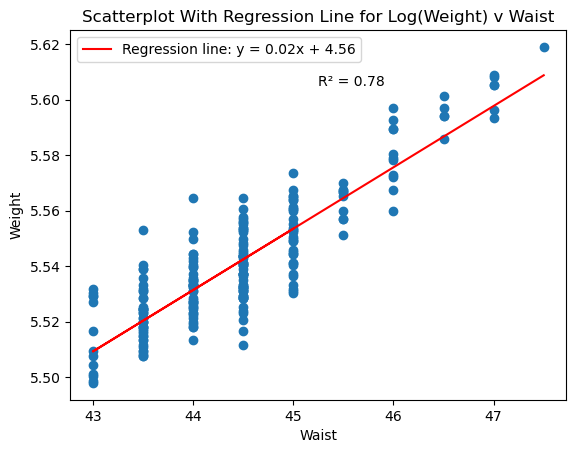

In [7]:
## Natural Log or Multiplicative Model
x = subset['Waist']
y = np.log(subset['Weight'])
model4 = ols("y ~ x", subset).fit()
print("Model 4")
print(model4.summary())
anova4 = anova_lm(model4)
print(anova4)
df = pd.read_html(StringIO(model4.summary().tables[1].as_html()),header=0,index_col=0)[0]
slope = df['coef'].values[1]
intercept = df['coef'].values[0]
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.scatter(x, y)
plt.plot(x, intercept + slope*x, 'r', label=f'Regression line: {equation}')
plt.text(0.5, 0.85, f'R² = {model4.rsquared:.2f}', transform=plt.gca().transAxes)
plt.xlabel('Waist')
plt.ylabel('Weight')
plt.title(f"Scatterplot With Regression Line for Log(Weight) v Waist")
plt.legend()
plt.show()

Model 5
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     100.5
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           8.89e-20
Time:                        06:32:50   Log-Likelihood:                 573.50
No. Observations:                 226   AIC:                            -1143.
Df Residuals:                     224   BIC:                            -1136.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6274      0.091     50.747 

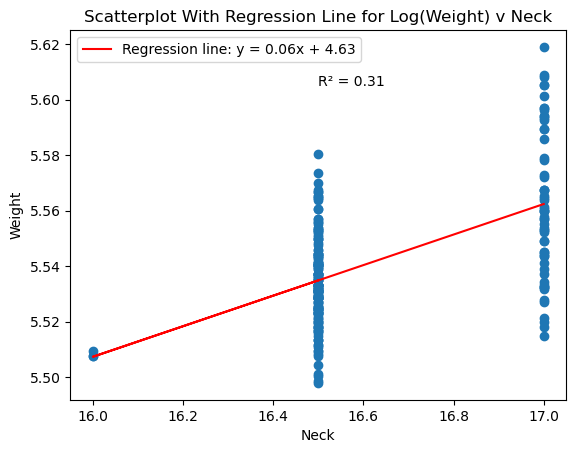

In [8]:
## Natural Log or Multiplicative Model
x = subset['Neck']
y = np.log(subset['Weight'])
model5 = ols("y ~ x", subset).fit()
print("Model 5")
print(model5.summary())
anova5 = anova_lm(model5)
print(anova5)
df = pd.read_html(StringIO(model5.summary().tables[1].as_html()),header=0,index_col=0)[0]
slope = df['coef'].values[1]
intercept = df['coef'].values[0]
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.scatter(x, y)
plt.plot(x, intercept + slope*x, 'r', label=f'Regression line: {equation}')
plt.text(0.5, 0.85, f'R² = {model5.rsquared:.2f}', transform=plt.gca().transAxes)
plt.xlabel('Neck')
plt.ylabel('Weight')
plt.title(f"Scatterplot With Regression Line for Log(Weight) v Neck")
plt.legend()
plt.show()

Model 6
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     4.625
Date:                Mon, 31 Mar 2025   Prob (F-statistic):             0.0326
Time:                        06:32:50   Log-Likelihood:                 533.93
No. Observations:                 226   AIC:                            -1064.
Df Residuals:                     224   BIC:                            -1057.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5462      0.003   2058.277 

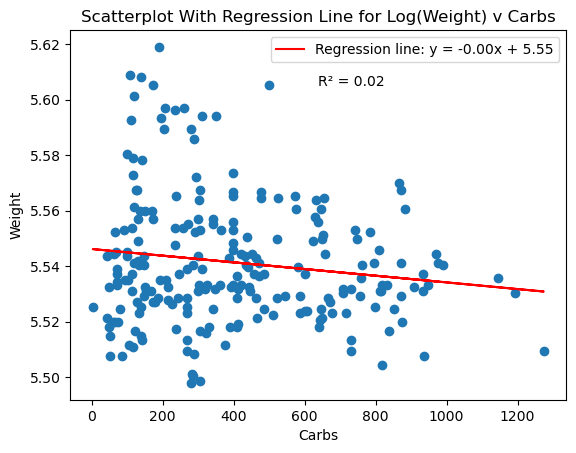

In [9]:
## Natural Log or Multiplicative Models
x = subset['Carbs']
y = np.log(subset['Weight'])
model6 = ols("y ~ x", subset).fit()
print("Model 6")
print(model6.summary())
anova6 = anova_lm(model6)
print(anova6)
df = pd.read_html(StringIO(model6.summary().tables[1].as_html()),header=0,index_col=0)[0]
slope = df['coef'].values[1]
intercept = df['coef'].values[0]
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.scatter(x, y)
plt.plot(x, intercept + slope*x, 'r', label=f'Regression line: {equation}')
plt.text(0.5, 0.85, f'R² = {model6.rsquared:.2f}', transform=plt.gca().transAxes)
plt.xlabel('Carbs')
plt.ylabel('Weight')
plt.title(f"Scatterplot With Regression Line for Log(Weight) v Carbs")
plt.legend()
plt.show()

Model 7
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     12.79
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           0.000426
Time:                        06:32:51   Log-Likelihood:                 537.90
No. Observations:                 226   AIC:                            -1072.
Df Residuals:                     224   BIC:                            -1065.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5481      0.002   2329.855 

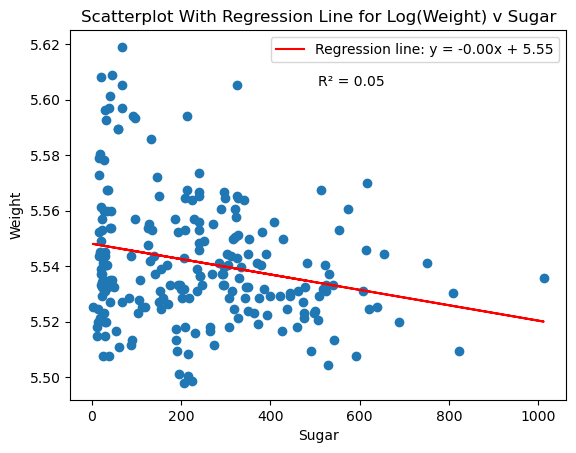

In [10]:
## Natural Log or Multiplicative Models
x = subset['Sugar']
y = np.log(subset['Weight'])
model7 = ols("y ~ x", subset).fit()
print("Model 7")
print(model7.summary())
anova7 = anova_lm(model7)
print(anova7)
df = pd.read_html(StringIO(model7.summary().tables[1].as_html()),header=0,index_col=0)[0]
slope = df['coef'].values[1]
intercept = df['coef'].values[0]
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.scatter(x, y)
plt.plot(x, intercept + slope*x, 'r', label=f'Regression line: {equation}')
plt.text(0.5, 0.85, f'R² = {model7.rsquared:.2f}', transform=plt.gca().transAxes)
plt.xlabel('Sugar')
plt.ylabel('Weight')
plt.title(f"Scatterplot With Regression Line for Log(Weight) v Sugar")
plt.legend()
plt.show()

In [18]:
## Collecting Regression Results
models = model1, model2, model3, model4, model5, model6, model7

def results(rows):
    for i in range(0, rows + 1):
        print('Regression Model', i+1, '------')
        print('\n R^2:', models[i].rsquared, end="")
        print('\n Adjusted R^2:', models[i].rsquared_adj, end="")
        print('\n F Statistics:', models[i].fvalue, end="")
        print('\n P-Value:', models[i].f_pvalue, end="")
        print('\n MSE:', models[i].mse_resid, end="")
        S2 = models[i].mse_resid,
        S = np.sqrt(S2)
        CV = 100*(S/subset['Weight'].mean())
        print('\n Coefficient Of Variation', CV[0].astype(float), end="")
        print('\n')
results(6)

Regression Model 1 ------

 R^2: 0.8027084080279066
 Adjusted R^2: 0.798224508210359
 F Statistics: 179.02014779334203
 P-Value: 1.845155376468735e-75
 MSE: 7.147308374078176
 Coefficient Of Variation 1.0479370381389017

Regression Model 2 ------

 R^2: 0.7950789505395626
 Adjusted R^2: 0.7923097471684756
 F Statistics: 287.11468389823284
 P-Value: 4.1057525047211226e-76
 MSE: 7.3568215352176765
 Coefficient Of Variation 1.0631854891808672

Regression Model 3 ------

 R^2: 0.7939057318926274
 Adjusted R^2: 0.7892217712538234
 F Statistics: 169.49453531175618
 P-Value: 2.2092129461535687e-73
 MSE: 7.4662040767641695
 Coefficient Of Variation 1.0710601429706144

Regression Model 4 ------

 R^2: 0.775804915412277
 Adjusted R^2: 0.774804044498939
 F Statistics: 775.129844491989
 P-Value: 1.124665057153136e-74
 MSE: 0.00011990001544797641
 Coefficient Of Variation 0.004292136742399562

Regression Model 5 ------

 R^2: 0.309700930526678
 Adjusted R^2: 0.30661923825224346
 F Statistics: 100.4

In [12]:
## Corrected CV For Log Models
for i in range(3, 7):
    S2 = models[i].mse_resid,
    S = np.sqrt(S2)
    CV = 100*(S/np.log(subset['Weight']).mean())
    print('\n Coefficient Of Variation for Model', i+1, CV[0].astype(float), end="")


 Coefficient Of Variation for Model 4 0.19759974768746177
 Coefficient Of Variation for Model 5 0.34673045252018264
 Coefficient Of Variation for Model 6 0.413081021222034
 Coefficient Of Variation for Model 7 0.4058941481759669

In [13]:
## Storing Model T Values
T = {'model1': model1.tvalues, 'model2': model2.tvalues, 'model3': model3.tvalues, 'model4': model4.tvalues, 'model5': model5.tvalues, 'model6': model6.tvalues, 'model7': model7.tvalues}
print(T)

{'model1': Intercept    0.728899
x1          -3.962383
x2           0.878506
x1:x2        1.203798
x12          1.466686
x22         -1.341706
dtype: float64, 'model2': Intercept    0.629317
x1          -0.586730
x2           0.558078
x3          -0.522217
dtype: float64, 'model3': Intercept    -1.908136
x1           20.986273
x2            3.195196
x3            2.775662
x4           -2.192302
x5           -1.752115
dtype: float64, 'model4': Intercept    129.161645
x             27.841154
dtype: float64, 'model5': Intercept    50.746871
x            10.024821
dtype: float64, 'model6': Intercept    2058.277298
x              -2.150643
dtype: float64, 'model7': Intercept    2329.855373
x              -3.576750
dtype: float64}


In [14]:
## Nested Model Check
x1 = subset['Waist']
x2 = subset['Neck']
y = subset['Weight']
reduced1 = ols("y ~ x1 + x2 + x1*x2", subset).fit()
Ranova1 = anova_lm(reduced1)

SSEC1 = anova1.sum_sq.iloc[5]
SSER1 = Ranova1.sum_sq.iloc[3]
F1 = ((SSER1 - SSEC1)/2)/(SSEC1/220)
print('The F Statistic For Nested Model 1 is', F1)

The F Statistic For Nested Model 1 is 3.0889229827241294


           Weight     Waist      Neck     Carbs   Protein     Sugar
Weight   1.000000  0.881919  0.557379 -0.144378 -0.136600 -0.233977
Waist    0.881919  1.000000  0.550281 -0.194545 -0.161825 -0.272036
Neck     0.557379  0.550281  1.000000 -0.365371 -0.148037 -0.422769
Carbs   -0.144378 -0.194545 -0.365371  1.000000  0.609489  0.946801
Protein -0.136600 -0.161825 -0.148037  0.609489  1.000000  0.477649
Sugar   -0.233977 -0.272036 -0.422769  0.946801  0.477649  1.000000


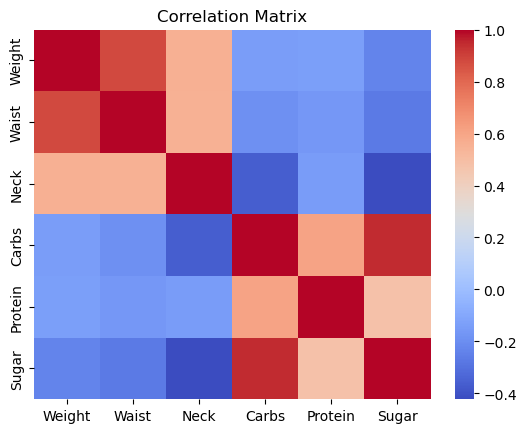

In [15]:
# Creating a Correlation Matrix to Check Multicollinearity
corr_matrix = subset.corr(method='pearson')
print(corr_matrix)

sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [16]:
## Variance Inflation Factor For Each Model
models = model1, model2, model3, model4, model5, model6, model7
for i in models:
    reg = i.model.exog
    vif = [variance_inflation_factor(reg, i) for i in range(reg.shape[1])]
    print(f"Model {models.index(i)+1}: {vif}")

Model 1: [27236966.806979027, 6473.840788439637, 21551.321657886285, 42256.305486054516, 15028.156712450174, 31617.88610133705]
Model 2: [4563042380.460758, 17129845.5900981, 68232604.16340573, 16996158.805411376]
Model 3: [6597.079022452895, 1.5500541780386428, 1.6412453962001254, 15.11191818205593, 12.818430675457483, 1.965259602494183]
Model 4: [2348.3005284975006, 1.0]
Model 5: [5090.212252252766, 1.0]
Model 6: [3.1316937473129136, 1.0]
Model 7: [2.5331617995532607, 0.9999999999999998]


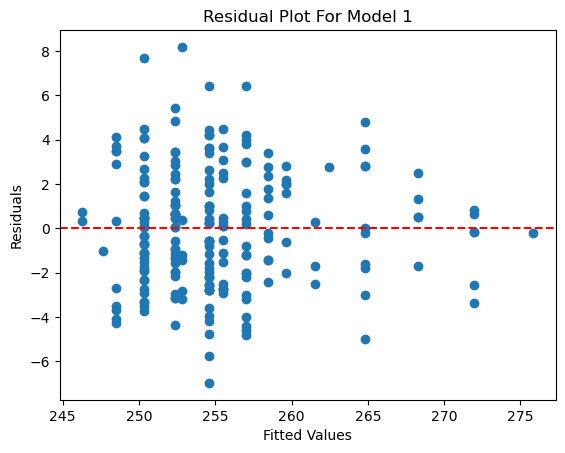

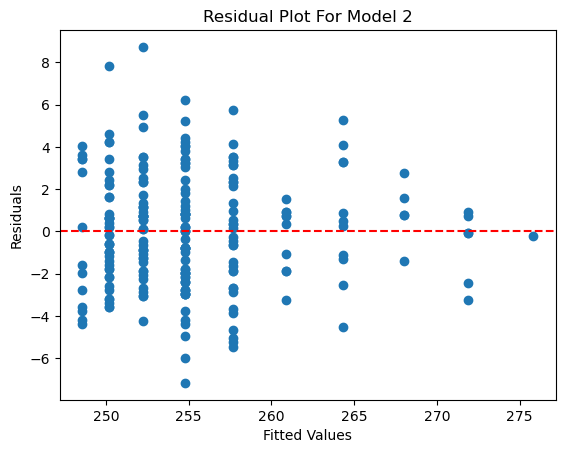

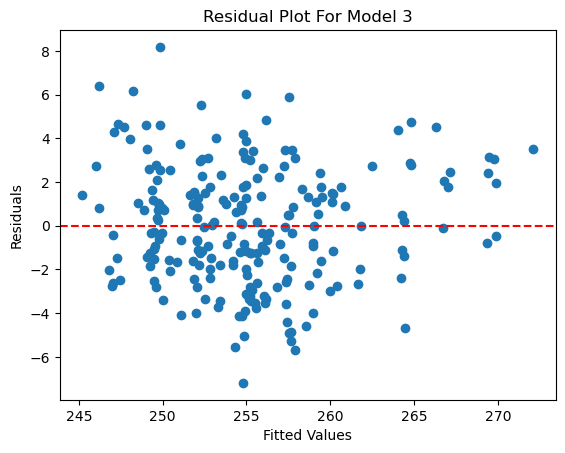

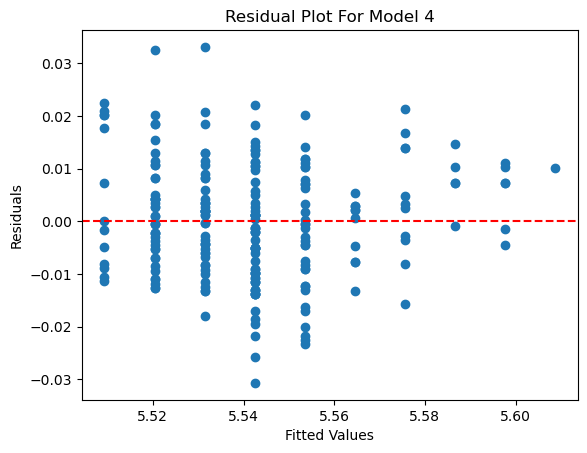

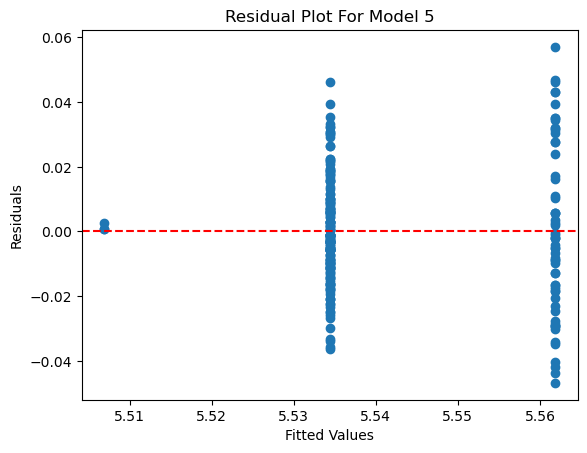

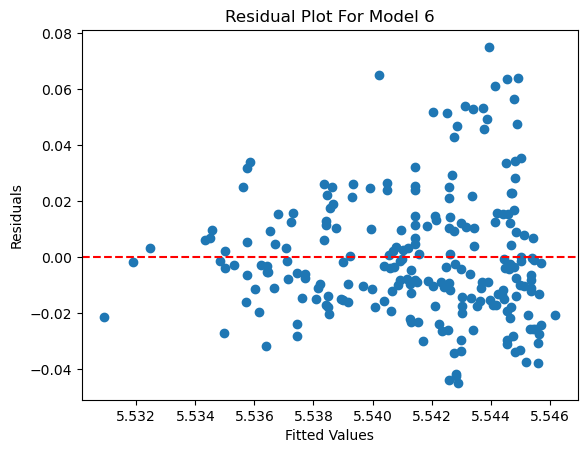

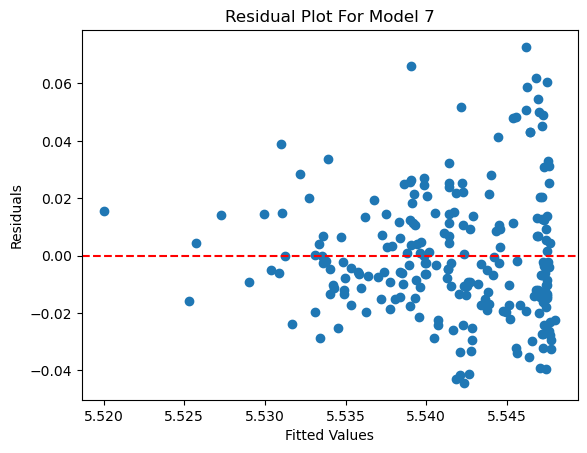

In [17]:
## Residual Plots For All Models
models = model1, model2, model3, model4, model5, model6, model7
for i in models:
    residuals = i.resid
    plt.scatter(i.fittedvalues, residuals)
    plt.xlabel("Fitted Values")
    plt.ylabel("Residuals")
    #plt.title("Residual Plot For Model", i)
    plt.title(f"Residual Plot For Model {models.index(i)+1}")
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()